## **Problem Statement**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.  


Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Attributes**  

**People**     

●	**ID**: Customer's unique identifier    
●	**Year_Birth**: Customer's birth year   
●	**Education**: Customer's education level   
●	**Marital_Status**: Customer's marital status   
●	**Income**: Customer's yearly household income    
●	**Kidhome**: Number of children in customer's household  
●	**Teenhome**: Number of teenagers in customer's household   
●	**Dt_Customer**: Date of customer's enrollment with the company  
●	**Recency**: Number of days since customer's last purchase   
●	**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise   


**Products**   

●	**MntWines**: Amount spent on wine in last 2 years   
●	**MntFruits**: Amount spent on fruits in last 2 years    
●	**MntMeatProducts**: Amount spent on meat in last 2 years    
●	**MntFishProducts**: Amount spent on fish in last 2 years    
●	**MntSweetProducts**: Amount spent on sweets in last 2 years     
●	**MntGoldProds**: Amount spent on gold in last 2 years    


**Promotion**   

●	**NumDealsPurchases**: Number of purchases made with a discount  
●	**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise   
●	**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
●	**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise    
●	**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise    
●	**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise    
●	**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise   


**Place**

●	**NumWebPurchases**: Number of purchases made through the company’s website        
●	**NumCatalogPurchases**: Number of purchases made using a catalogue     
●	**NumStorePurchases**: Number of purchases made directly in stores     
●	**NumWebVisitsMonth**: Number of visits to company’s website in the last month     

## Target 

Need to perform clustering to summarize customer segments.




In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

Selected Features:
Recency
MntMeatProducts
MntWines
Income
MntGoldProds
Year_Birth
MntSweetProducts
MntFishProducts
MntFruits
NumWebVisitsMonth


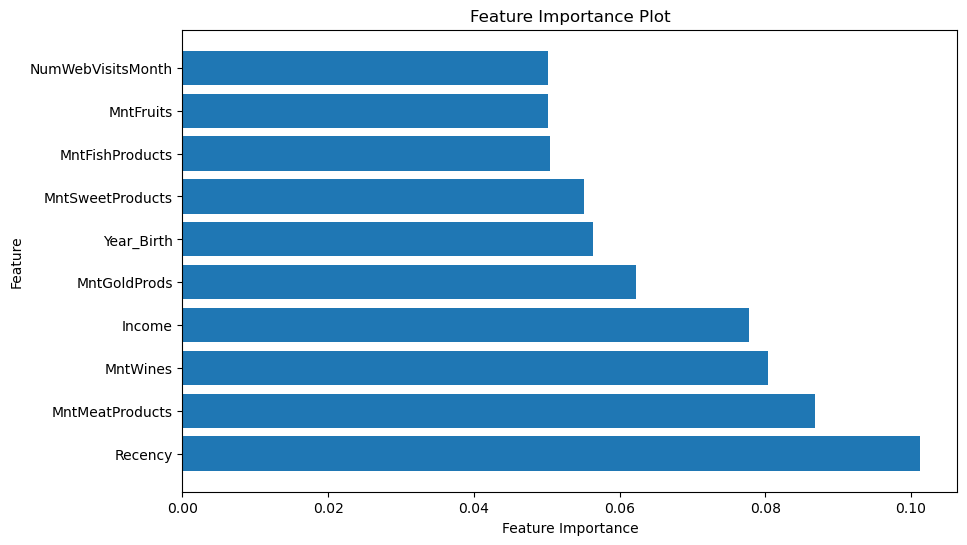

In [11]:

df = pd.read_excel("marketing_campaign1.xlsx")

# Drop non-numeric columns
numeric_df = df.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer'])


numeric_df.fillna(0, inplace=True)


X = numeric_df.drop(columns=['Response'])
y = numeric_df['Response']


clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)


feature_importances = clf.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Set a threshold for feature selection based on feature importance
threshold = 0.05


selected_features = X.columns[sorted_indices[feature_importances[sorted_indices] > threshold]]


print("Selected Features:")
for feature in selected_features:
    print(feature)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), feature_importances[sorted_indices][feature_importances[sorted_indices] > threshold], align='center')
plt.yticks(range(len(selected_features)), X.columns[sorted_indices][feature_importances[sorted_indices] > threshold])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [13]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [14]:
df.shape

(2240, 29)

## Feature Engineering

In [15]:
#Total  amount spendings on various items
df["total_amount_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [16]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_amount_spent,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,1
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,716,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,590,1
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,169,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,49,2


In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'total_amount_spent', 'Children'],
      dtype='object')

## EDA

In [18]:
to_drop = [ "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID" ,'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

df=df.drop(to_drop,axis=1)

In [19]:
#df1=df[['Recency','MntMeatProducts','MntWines','Income','MntGoldProds','Year_Birth','MntSweetProducts','MntFishProducts','MntFruits','NumWebVisitsMonth', 'Education', 'Marital_Status','Response']]
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amount_spent,Children
0,Graduation,Single,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,1617,0
1,Graduation,Single,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,27,2
2,Graduation,Together,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,Graduation,Together,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0,53,1
4,PhD,Married,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0,422,1


In [11]:
df.shape

(2240, 20)

In [23]:
# continious variables and categorical variables 
categorical_variables = df.select_dtypes(include=["object"])
continuous_variables = df.select_dtypes(include=["int64", "float64"])

In [24]:
print(categorical_variables.columns)
print(continuous_variables.columns)

Index(['Education', 'Marital_Status'], dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'total_amount_spent', 'Children'],
      dtype='object')


In [25]:
# checking data types of features
continuous_variables.dtypes

Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
total_amount_spent       int64
Children                 int64
dtype: object

In [26]:
# checking null values and getting total amount of null values
continuous_variables.isnull().sum()

Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
total_amount_spent      0
Children                0
dtype: int64

In [28]:
categorical_variables.isnull().sum()

Education         0
Marital_Status    0
dtype: int64

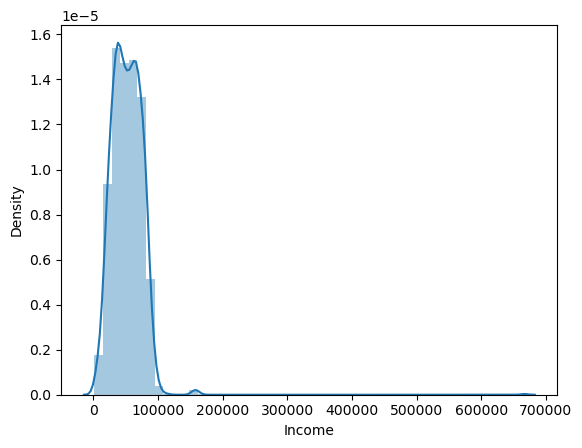

In [27]:
## plotting the Income column
sns.distplot(continuous_variables['Income'])
plt.show()

In [29]:
# dropping null values
continuous_variables.dropna(inplace=True)
continuous_variables.shape

(2216, 18)

In [30]:
## checking if any duplicates are present
continuous_variables.duplicated().any()
continuous_variables[continuous_variables.duplicated()]

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amount_spent,Children
83,38620.0,0,0,56,1,2,5,3,3,0,0,0,0,0,0,0,318,0
179,78497.0,0,0,44,1,5,7,12,2,0,0,0,1,0,0,0,978,0
281,51369.0,0,1,84,2,8,2,4,8,0,0,0,0,0,0,0,576,1
282,37760.0,0,0,20,2,4,1,6,7,0,0,0,0,0,0,0,317,0
363,37717.0,1,0,31,1,1,0,2,9,0,0,0,0,0,0,0,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,22775.0,1,0,40,1,1,0,2,8,0,0,0,0,0,0,0,15,1
2221,75777.0,0,0,12,1,3,6,11,1,0,1,1,0,0,0,1,1438,0
2225,58554.0,1,1,55,6,8,2,6,7,0,0,0,0,0,0,0,586,2
2234,34421.0,1,0,81,1,1,0,2,7,0,0,0,0,0,0,0,30,1


In [31]:
## dropping duplicates
continuous_variables=continuous_variables.drop_duplicates().reset_index(drop=True)
continuous_variables[continuous_variables.duplicated()]
continuous_variables.shape

(2030, 18)

In [32]:
## statiscal view of data
continuous_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2030.0,52370.341379,25544.478420,1730.0,35528.25,51550.0,68592.0,666666.0
Kidhome,2030.0,0.442857,0.535976,0.0,0.00,0.0,1.0,2.0
Teenhome,2030.0,0.508374,0.546217,0.0,0.00,0.0,1.0,2.0
Recency,2030.0,48.891626,28.981598,0.0,24.00,49.0,74.0,99.0
NumDealsPurchases,2030.0,2.335468,1.934429,0.0,1.00,2.0,3.0,15.0
NumWebPurchases,2030.0,4.100493,2.757802,0.0,2.00,4.0,6.0,27.0
NumCatalogPurchases,2030.0,2.672414,2.939270,0.0,0.00,2.0,4.0,28.0
NumStorePurchases,2030.0,5.784729,3.240707,0.0,3.00,5.0,8.0,13.0
NumWebVisitsMonth,2030.0,5.322660,2.439172,0.0,3.00,6.0,7.0,20.0
AcceptedCmp3,2030.0,0.073892,0.261659,0.0,0.00,0.0,0.0,1.0


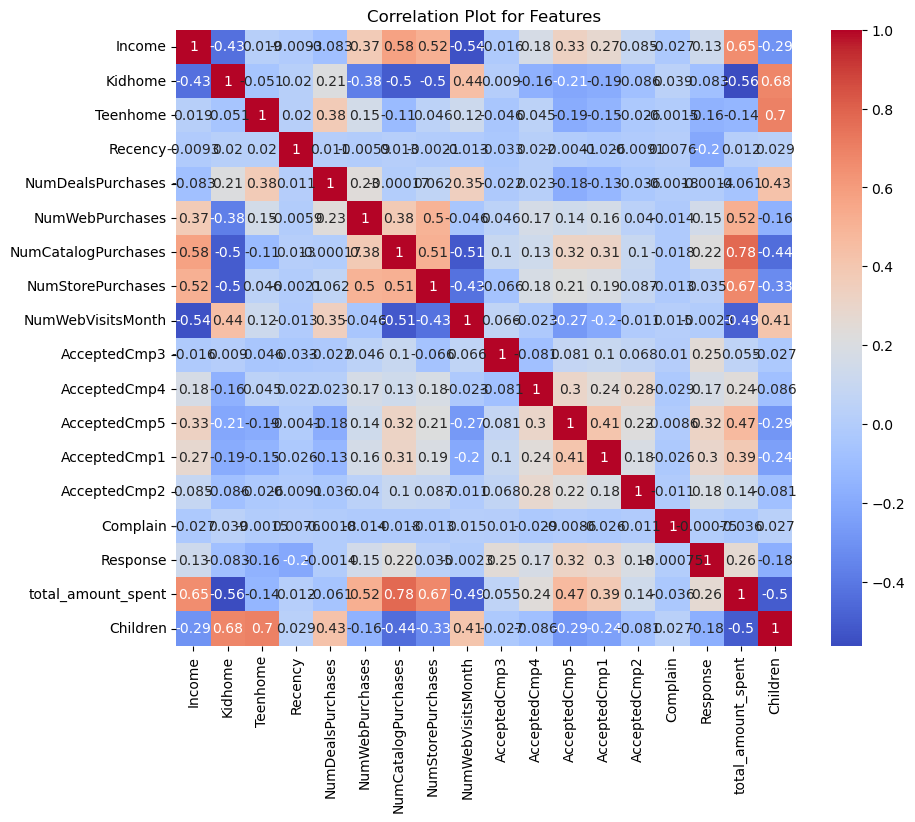

In [33]:
# Compute the correlation matrix
corr_matrix = continuous_variables.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot for Features')
plt.show()

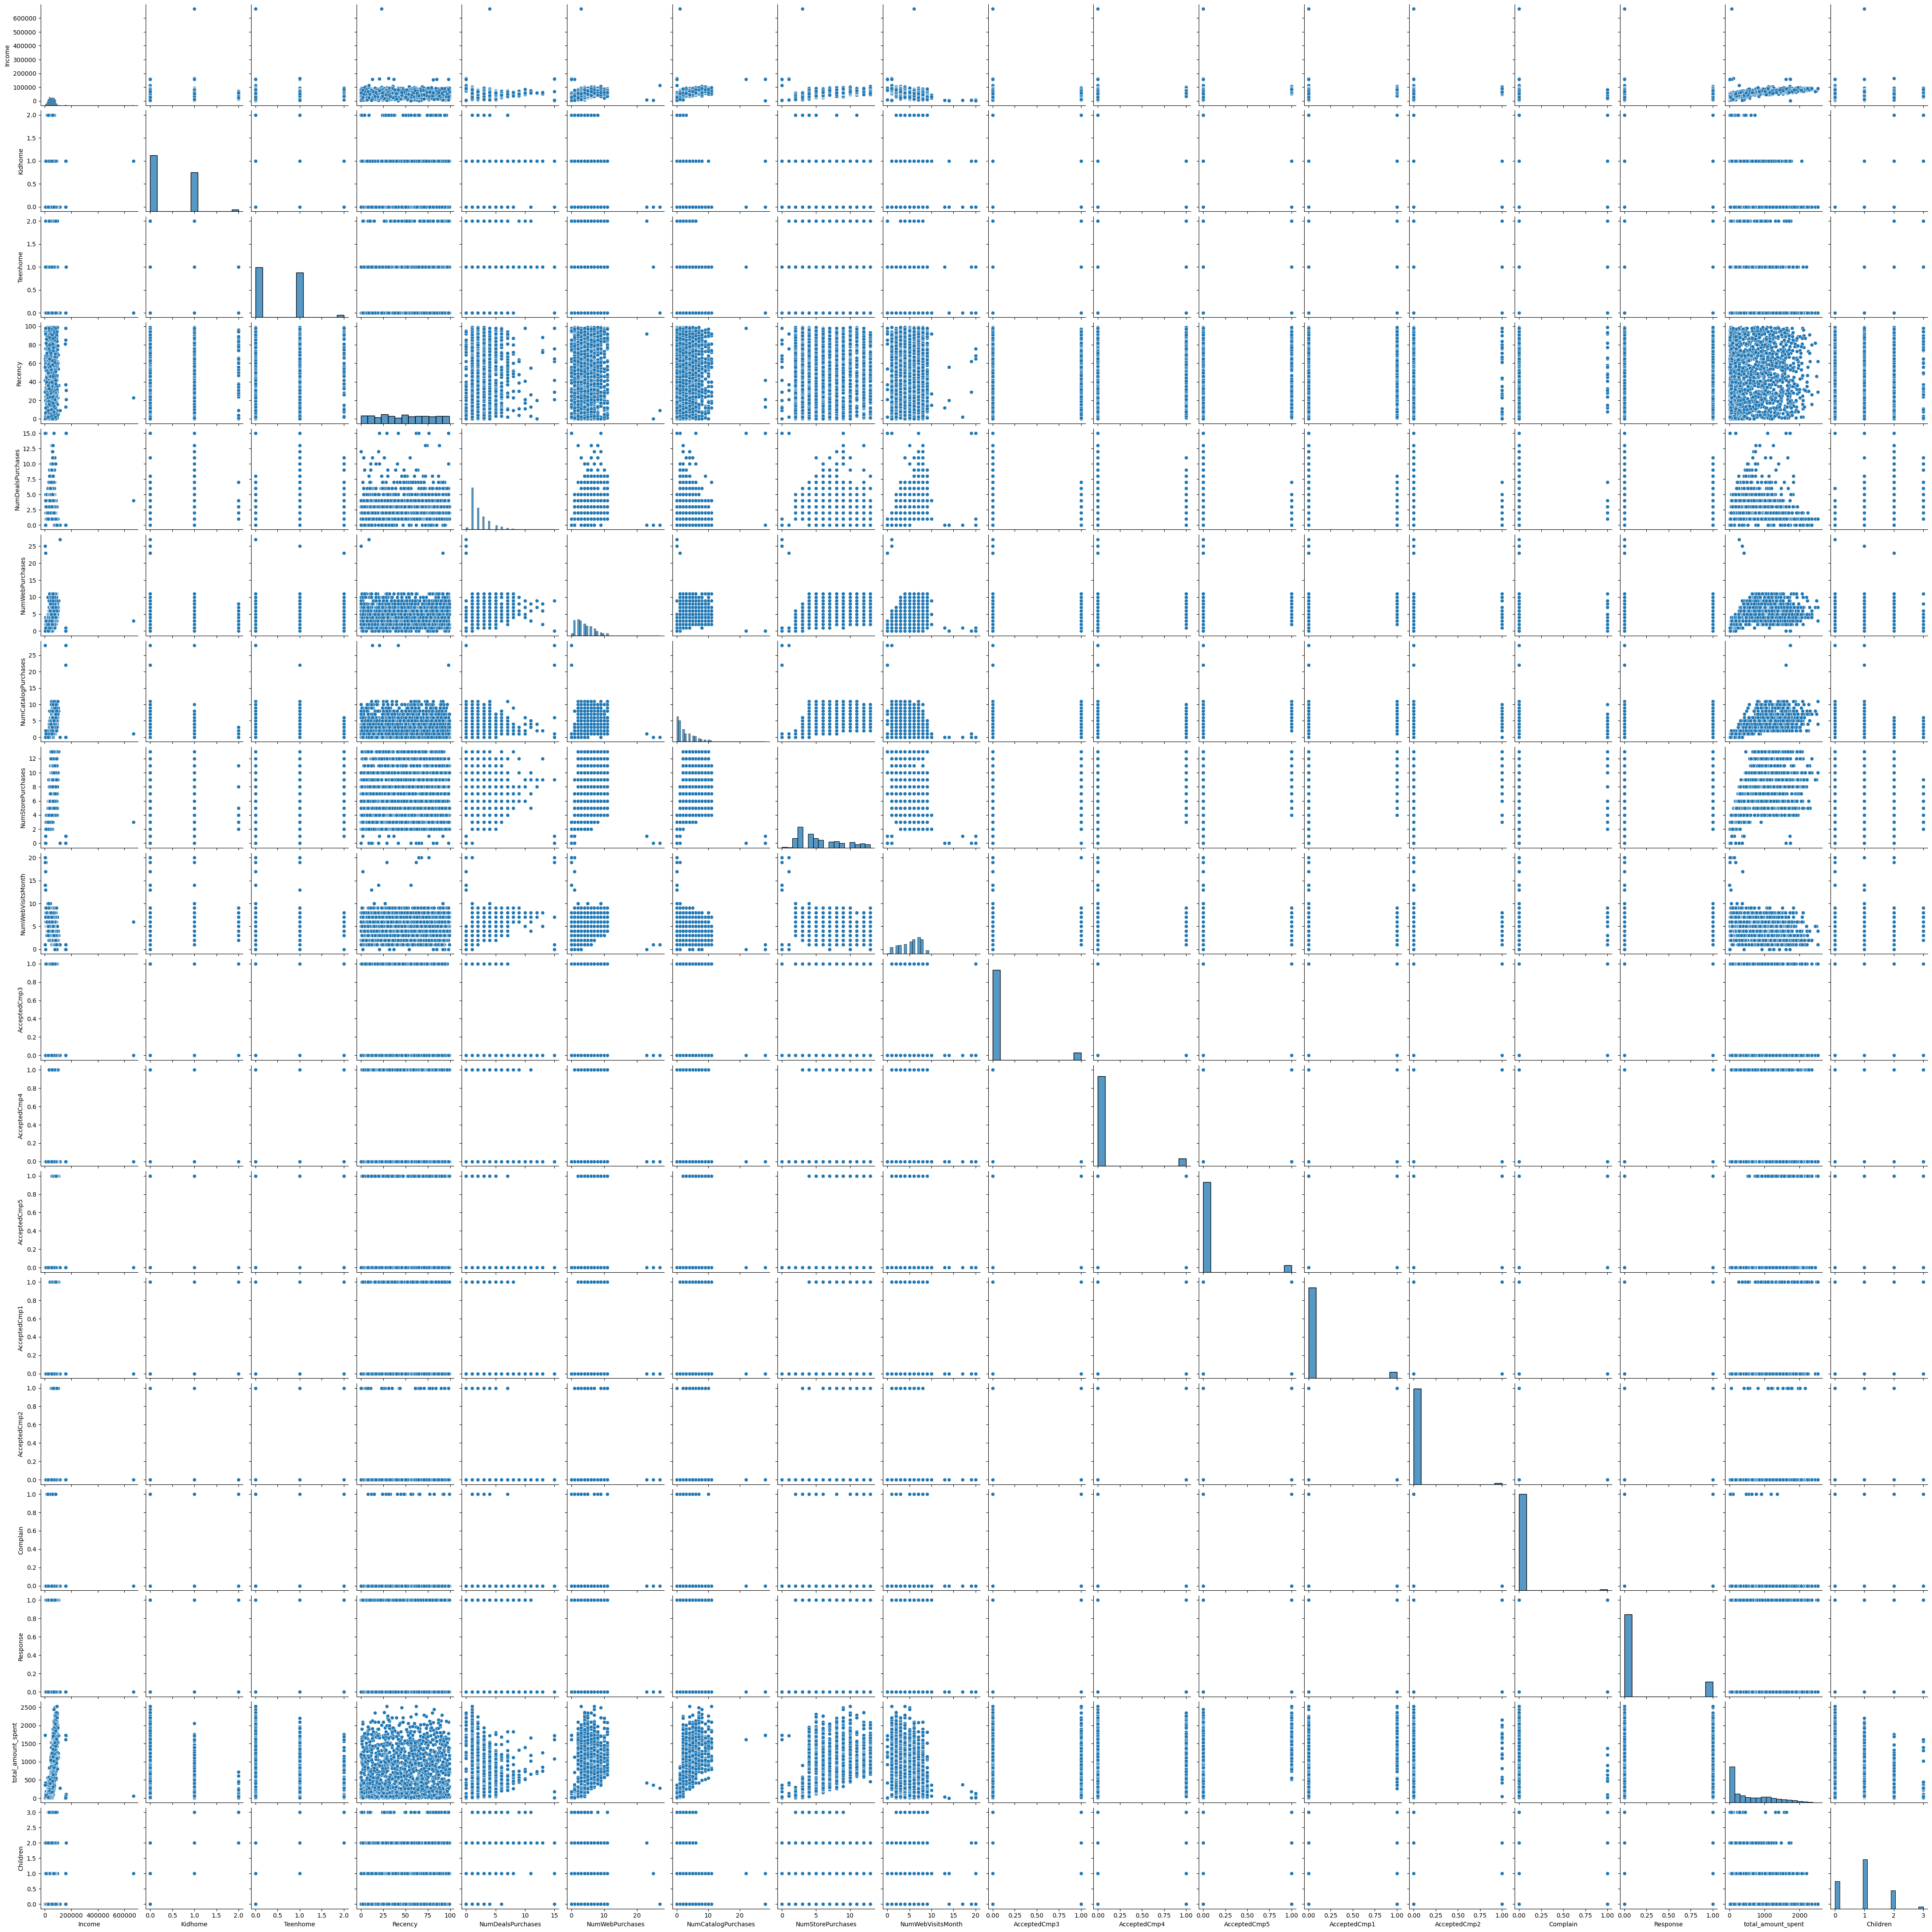

In [34]:
sns.pairplot(continuous_variables)
plt.show()

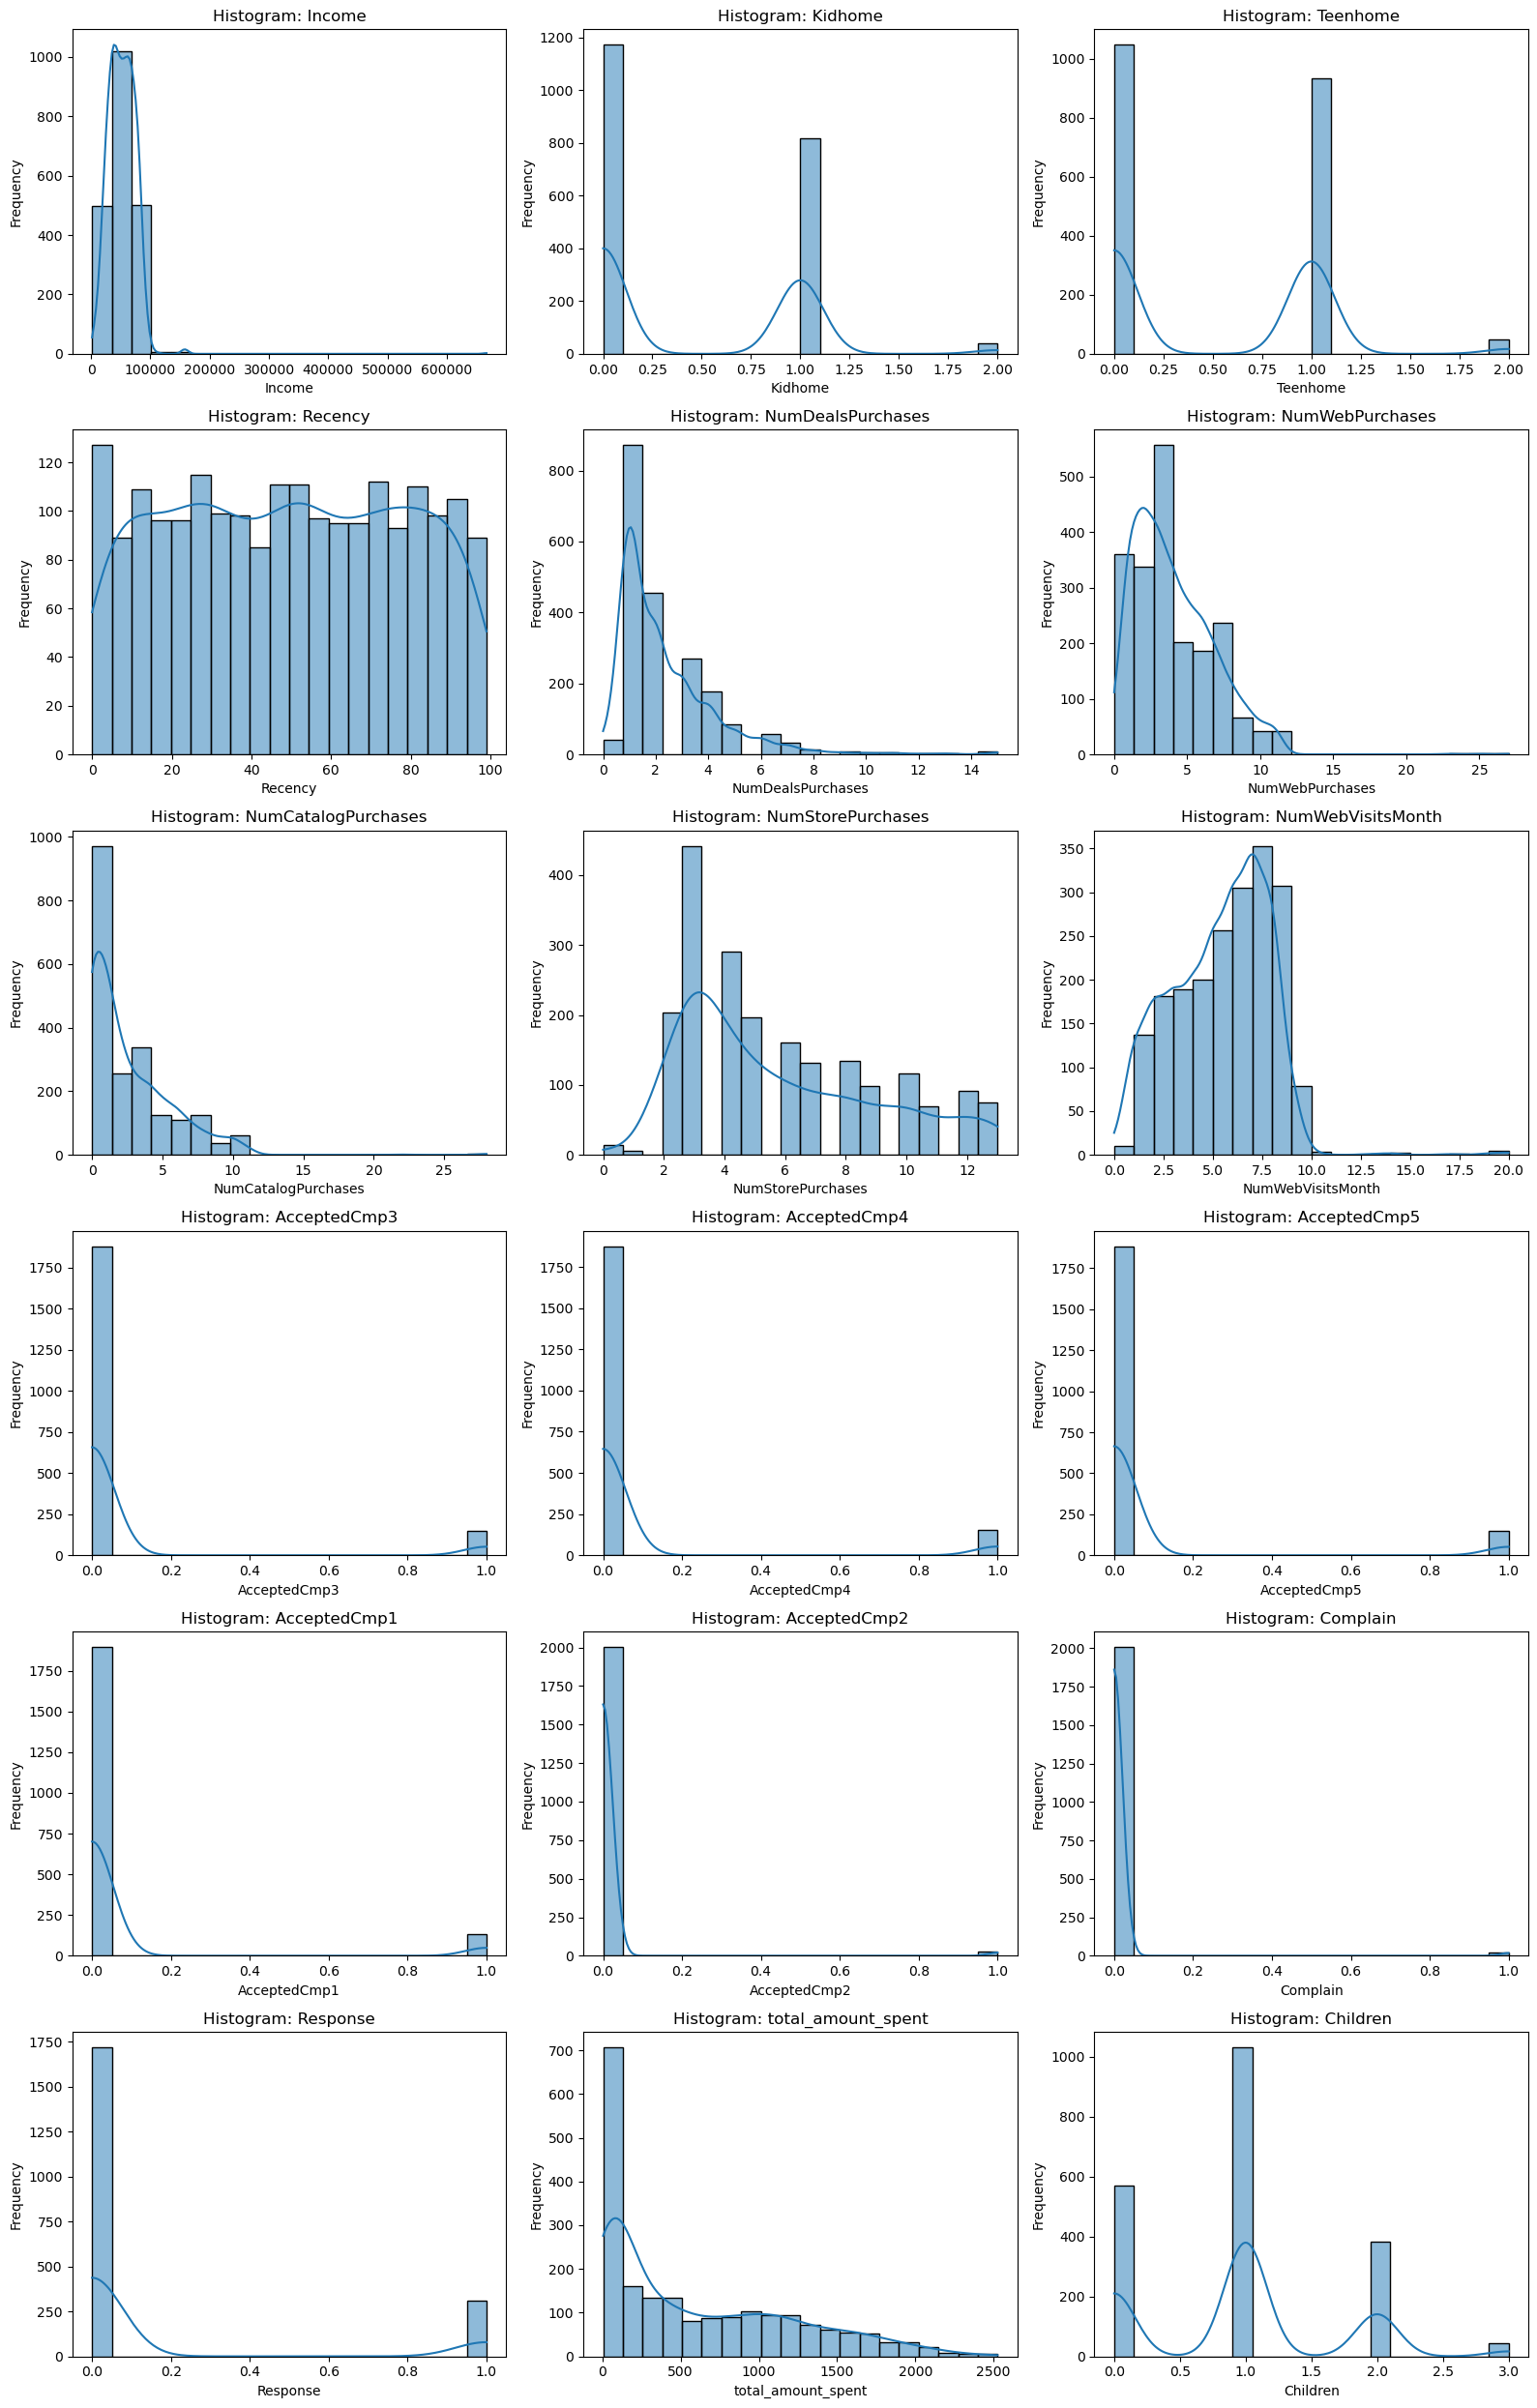

In [41]:
## Histogram

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(6, 3, figsize=(16, 25))

# Iterate through features and plot histograms
for i, feature in enumerate(continuous_variables.columns):
    row, col = divmod(i, 3)  # Calculate row and column indices
    sns.histplot(continuous_variables[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram: {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

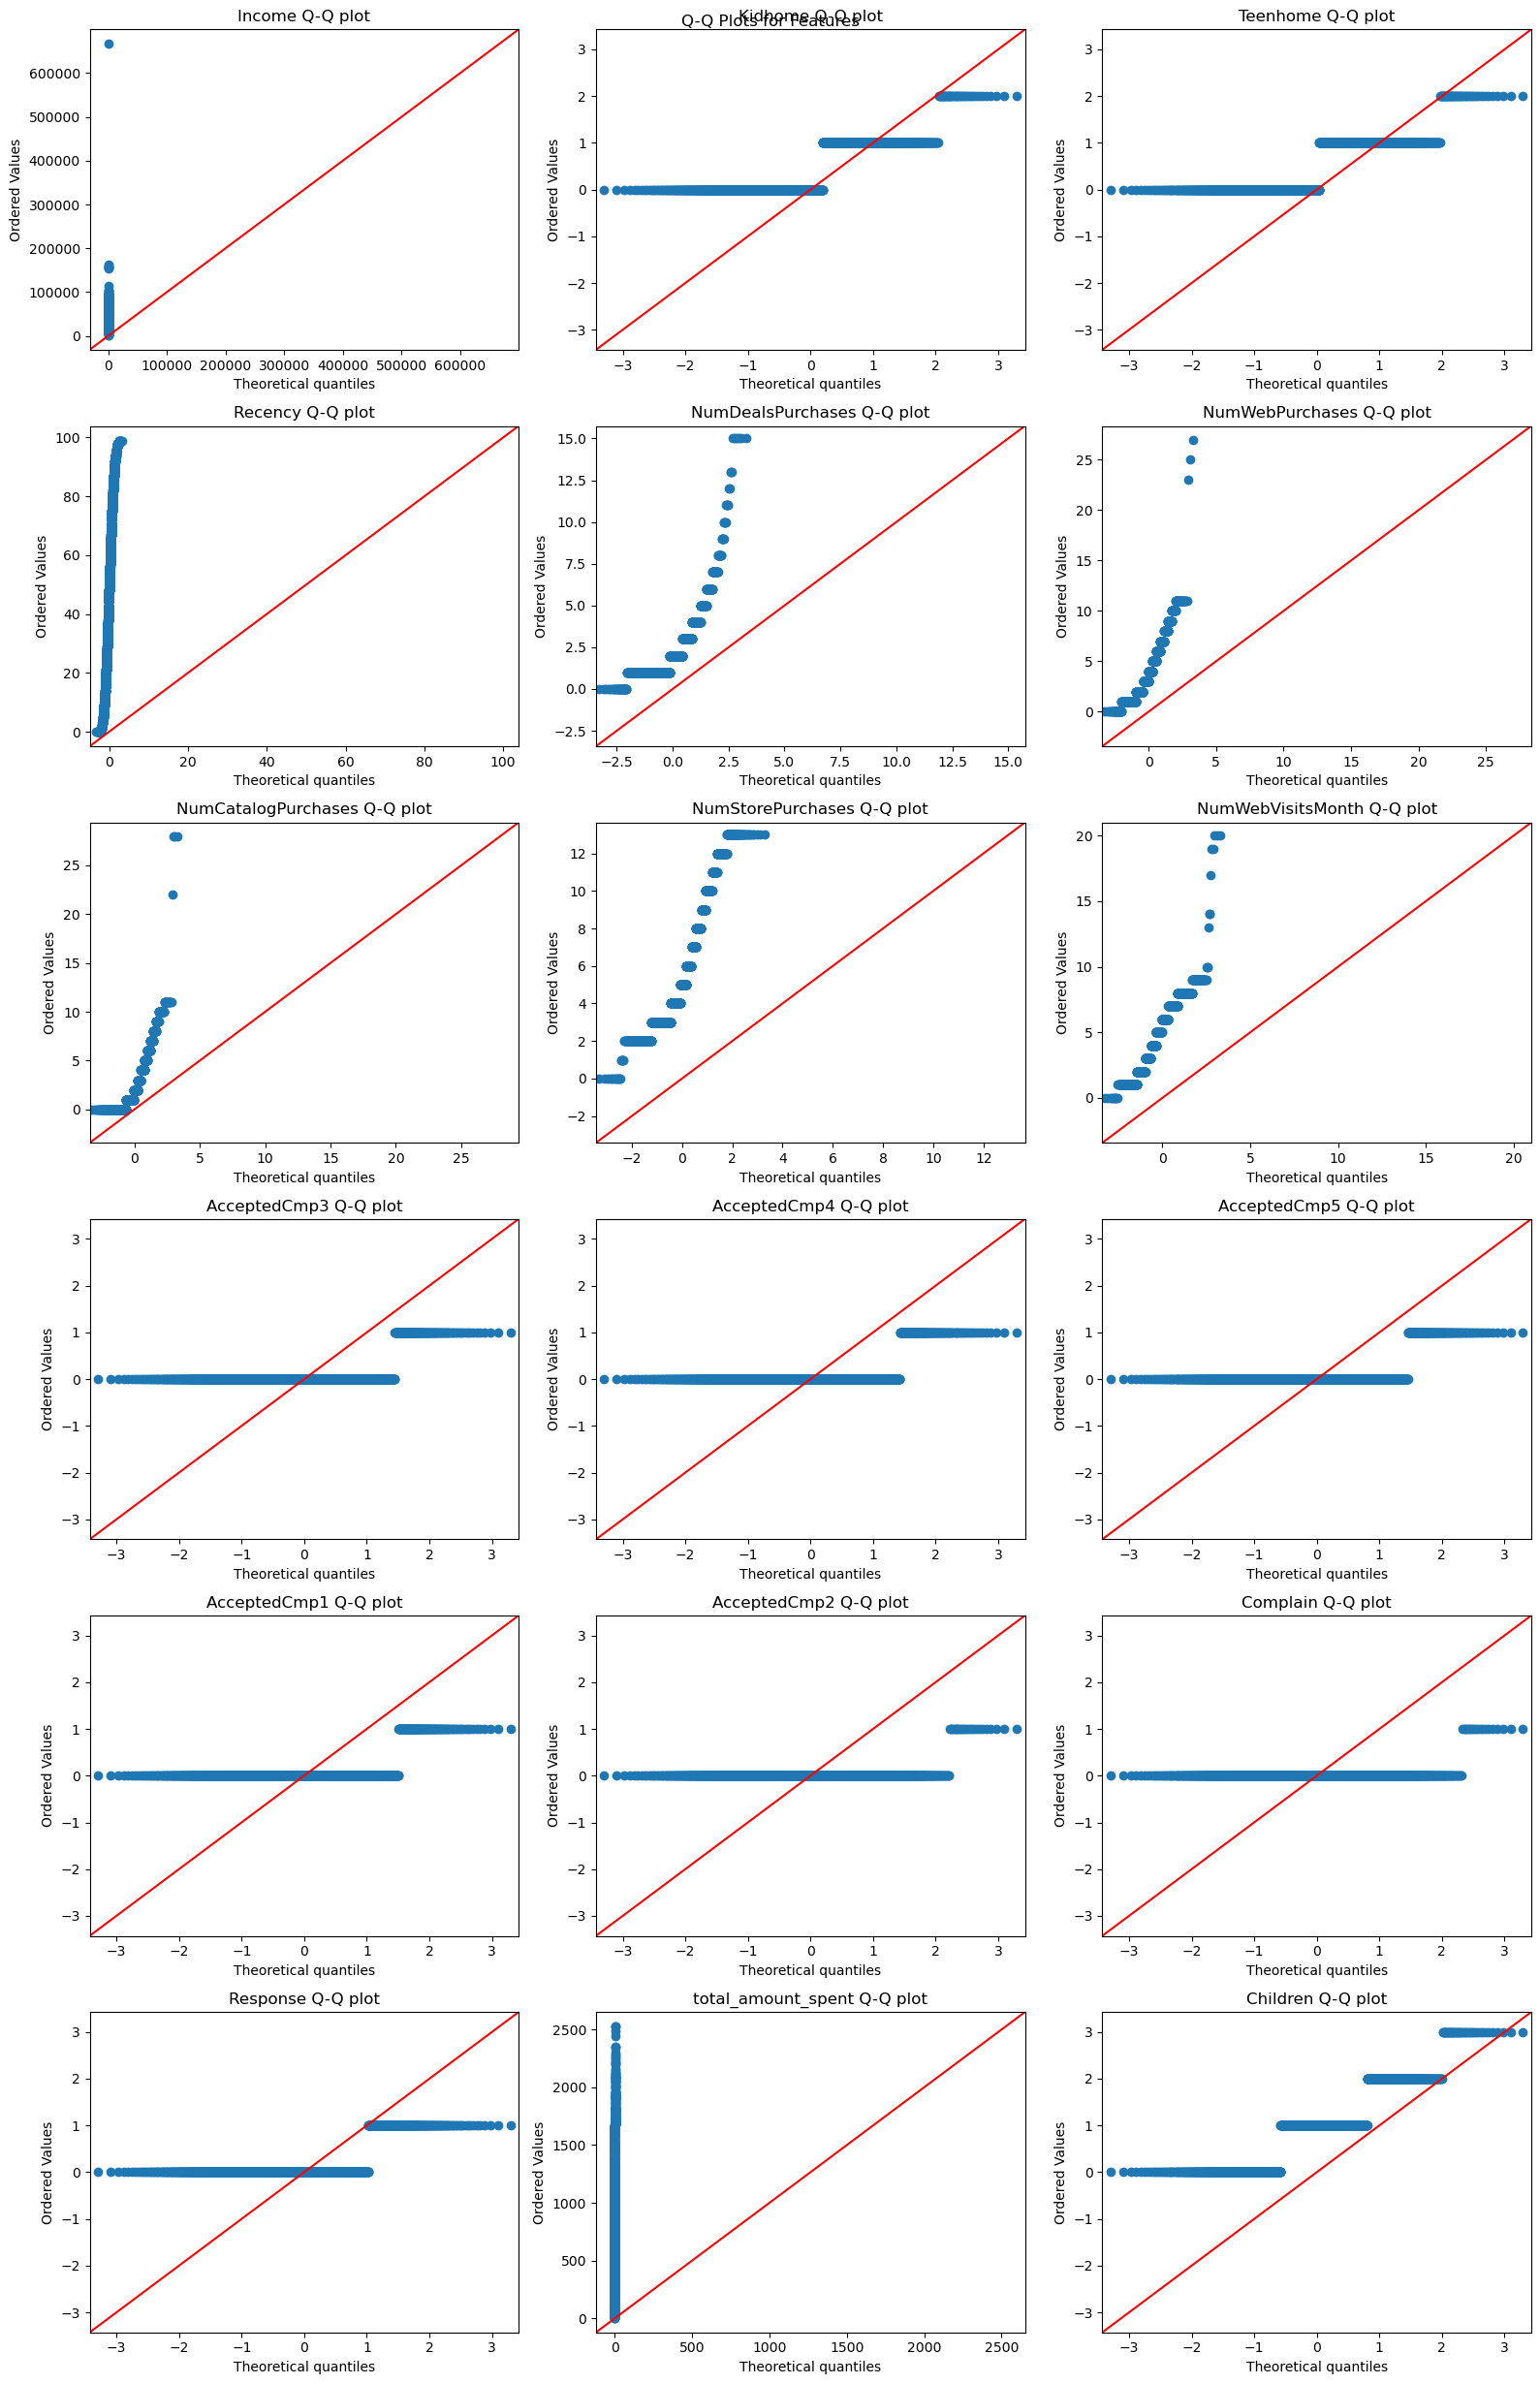

In [43]:
## Q-Q plot

# Create subplots
fig, axes = plt.subplots(6, 3, figsize=(16, 25))
fig.suptitle('Q-Q Plots for Features')

# Generate Q-Q plots for each feature
for i, feature in enumerate(continuous_variables.columns):
    row, col = divmod(i, 3)
    sm.qqplot(continuous_variables[feature], line='45', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Q-Q plot')
    axes[row, col].set_xlabel('Theoretical quantiles')
    axes[row, col].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

In [128]:
#Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in categorical_variables.select_dtypes(include=["object"]):
    categorical_variables[column] = le.fit_transform(categorical_variables[column])
print(categorical_variables.head())
print(categorical_variables.shape)

   Education  Marital_Status
0          2               4
1          2               4
2          2               5
3          2               5
4          4               3
(2240, 2)


In [129]:
#data is not standardized we have to do data normal distribution and then PCA...
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(continuous_variables)
continuous_variables = pd.DataFrame(scaled_df, columns=continuous_variables.columns)
continuous_variables.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amount_spent,Children
0,0.225844,-0.826467,-0.930949,0.314359,0.343613,1.414340,2.493610,-0.550858,0.687837,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,2.355501,1.671614,-1.275988
1,-0.235974,1.039748,0.900278,-0.375904,-0.173462,-1.124539,-0.569130,-1.168159,-0.132315,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.962497,1.406825
2,0.753486,-0.826467,-0.930949,-0.790062,-0.690538,1.414340,-0.228825,1.301046,-0.542391,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,0.278351,-1.275988
3,-1.007289,1.039748,-0.930949,-0.790062,-0.173462,-0.761842,-0.909434,-0.550858,0.277761,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.919424,0.065418
4,0.231914,1.039748,-0.930949,1.556832,1.377765,0.326249,0.111479,0.066444,-0.132315,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.308111,0.065418


In [130]:
X=continuous_variables
X.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amount_spent,Children
0,0.225844,-0.826467,-0.930949,0.314359,0.343613,1.414340,2.493610,-0.550858,0.687837,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,2.355501,1.671614,-1.275988
1,-0.235974,1.039748,0.900278,-0.375904,-0.173462,-1.124539,-0.569130,-1.168159,-0.132315,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.962497,1.406825
2,0.753486,-0.826467,-0.930949,-0.790062,-0.690538,1.414340,-0.228825,1.301046,-0.542391,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,0.278351,-1.275988
3,-1.007289,1.039748,-0.930949,-0.790062,-0.173462,-0.761842,-0.909434,-0.550858,0.277761,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.919424,0.065418
4,0.231914,1.039748,-0.930949,1.556832,1.377765,0.326249,0.111479,0.066444,-0.132315,-0.282466,-0.287518,-0.279405,-0.264784,-0.113904,-0.099751,-0.424538,-0.308111,0.065418


          0         1
0  2.449450 -0.020439
1 -2.326844  0.039503
2  1.740806 -0.315894
3 -1.921038 -1.288211
4 -0.532122  0.470906


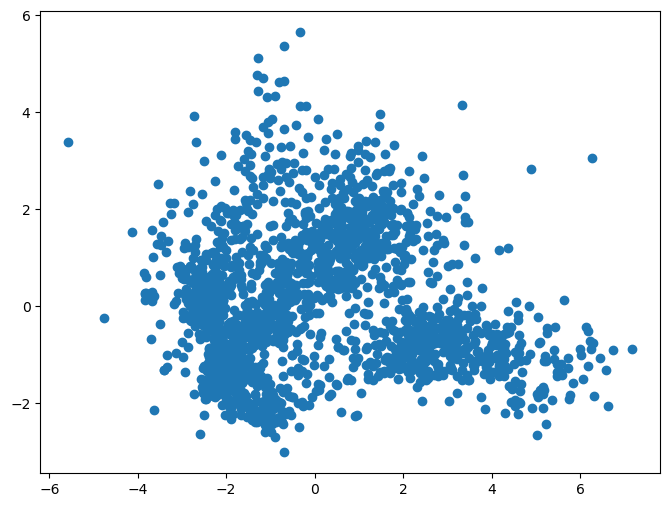

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],)
X_pca_df=pd.DataFrame(X_pca)
print(X_pca_df.head())

In [68]:
## we are concaniting our pca data and categorical variables inot final_X variable
final_X = pd.concat([X_pca_df, categorical_variables], axis=1, ignore_index=True)
final_X.head()

,0,1,2,3
0,2.449385,-0.020863,2,4
1,-2.326871,0.039744,2,4
2,1.740758,-0.314040,2,5
3,-1.921038,-1.288085,2,5
4,-0.532121,0.470885,4,3


In [69]:
final_X.isnull().sum()

0    210
1    210
2      0
3      0
dtype: int64

In [70]:
final_X.dropna(inplace=True)

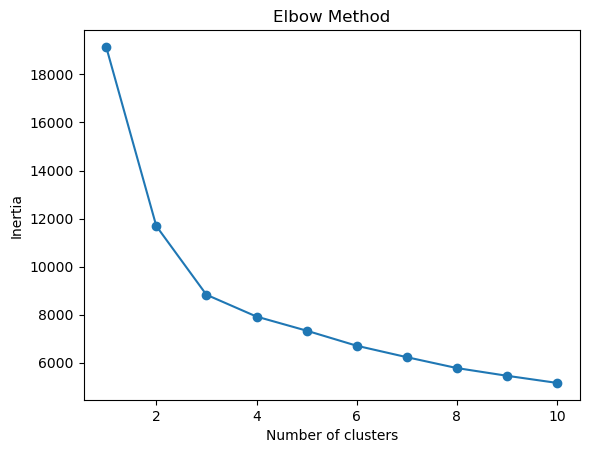

Cluster
2    583
3    539
1    462
0    446
Name: count, dtype: int64
Cluster centroids:
 [[-2.05858997  0.68938101]
 [ 3.14657968 -0.83599014]
 [-1.60972561 -1.33508586]
 [ 0.74746075  1.59020143]]


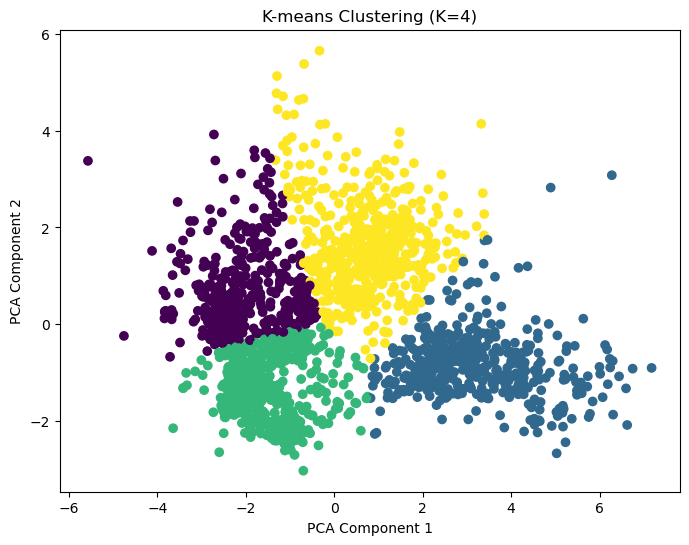

In [71]:
# Importing necessary libraries
from sklearn.cluster import KMeans


# Assuming final_X is the reduced dimensional data after PCA

# Choosing the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow method graph, choose the optimal number of clusters
# Let's assume the optimal number of clusters is 3
k = 4

# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adding the cluster labels to the DataFrame
final_X['Cluster'] = clusters

# Printing the count of data points in each cluster
print(final_X['Cluster'].value_counts())

# You can further analyze the clusters by checking the cluster centroids and interpreting them.
# For example, you can get the cluster centroids using:
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualizing the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (K=4)')
plt.show()

                0         1         2         3
Cluster                                        
0       -2.058590  0.689381  2.441704  3.717489
1        3.146580 -0.835990  2.318182  3.813853
2       -1.609726 -1.335086  2.487136  3.699828
3        0.747461  1.590201  2.371058  3.701299


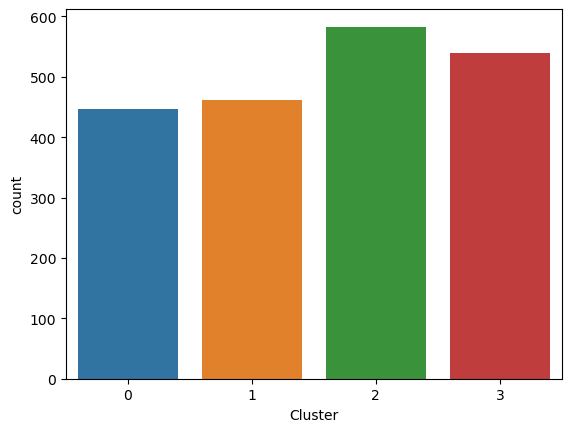

In [74]:
# Analyzing the characteristics of each cluster
K_cluster_means = final_X.groupby('Cluster').mean()
print(K_cluster_means)



## countplot of each clusters
sns.countplot(x=final_X['Cluster'])
plt.show()

### Model Building for Kmeans clustering

In [75]:
final_X

,0,1,2,3,Cluster
0,2.449385,-0.020863,2,4,1
1,-2.326871,0.039744,2,4,0
2,1.740758,-0.314040,2,5,1
3,-1.921038,-1.288085,2,5,2
4,-0.532121,0.470885,4,3,0
...,...,...,...,...,...
2025,6.276521,3.078699,3,3,1
2026,0.833418,1.256099,2,5,3
2027,2.048191,-0.278236,2,2,1
2028,1.429494,1.194361,3,5,3


In [77]:
X=final_X.iloc[:,:-1]
y=final_X['Cluster']
print(X.head())
print(y.head())

          0         1  2  3
0  2.449385 -0.020863  2  4
1 -2.326871  0.039744  2  4
2  1.740758 -0.314040  2  5
3 -1.921038 -1.288085  2  5
4 -0.532121  0.470885  4  3
0    1
1    0
2    1
3    2
4    0
Name: Cluster, dtype: int32


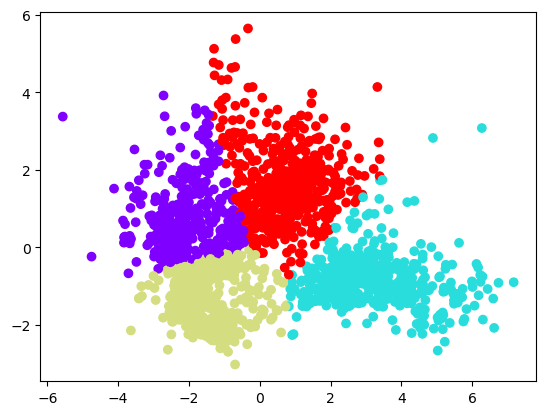

In [78]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.show()

In [79]:
## Doing train test split(pca data and cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(1522, 4)


(508, 4)

In [80]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9986859395532195
Test accuracy: 0.9940944881889764


In [81]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9704724409448819


In [82]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = DecisionTreeClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.968503937007874


In [83]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.988173455978975
Test accuracy: 0.9921259842519685


In [84]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9776609724047306
Test accuracy: 0.9704724409448819


#### conclusion
Decision tree gives good accuracy in kmeans clustering

## Agglomerative Clustering 

In [93]:
final_x_agglo=final_X.iloc[:,:-1]
final_x_agglo

,0,1,2,3
0,2.449385,-0.020863,2,4
1,-2.326871,0.039744,2,4
2,1.740758,-0.314040,2,5
3,-1.921038,-1.288085,2,5
4,-0.532121,0.470885,4,3
...,...,...,...,...
2025,6.276521,3.078699,3,3
2026,0.833418,1.256099,2,5
2027,2.048191,-0.278236,2,2
2028,1.429494,1.194361,3,5


In [94]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=4)
cluster = agglomerative_cluster.fit_predict(final_x_agglo)
# Add cluster labels to the original dataset
final_x_agglo['Agglomerative Cluster'] = cluster
final_x_agglo.head(8)

,0,1,2,3,Agglomerative Cluster
0,2.449385,-0.020863,2,4,1
1,-2.326871,0.039744,2,4,0
2,1.740758,-0.314040,2,5,1
3,-1.921038,-1.288085,2,5,0
4,-0.532121,0.470885,4,3,0
5,0.784380,1.241159,3,5,2
6,0.174320,1.585184,2,2,2
7,-1.829611,-0.857262,4,3,0


                              0         1         2         3
Agglomerative Cluster                                        
0                     -1.768845 -0.688984  2.775907  3.971503
1                      3.065329 -0.811559  2.425577  3.844864
2                      0.793168  1.841365  2.739348  3.714286
3                     -1.081382  0.482474  1.295812  3.115183


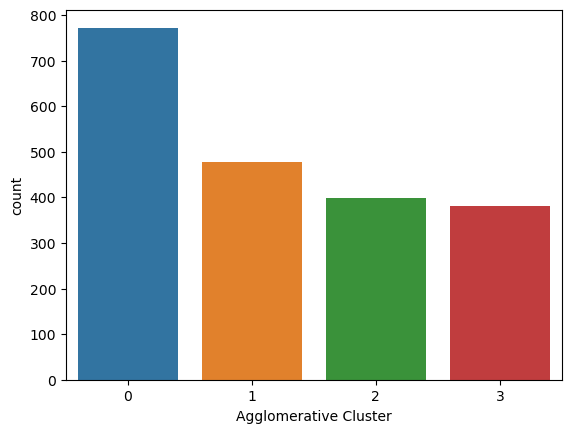

In [97]:
# Analyzing the characteristics of each Agglomerative cluster
Agglomerative_means = final_x_agglo.groupby('Agglomerative Cluster').mean()
print(Agglomerative_means)



## countplot of each clusters
sns.countplot(x=final_x_agglo['Agglomerative Cluster'])
plt.show()

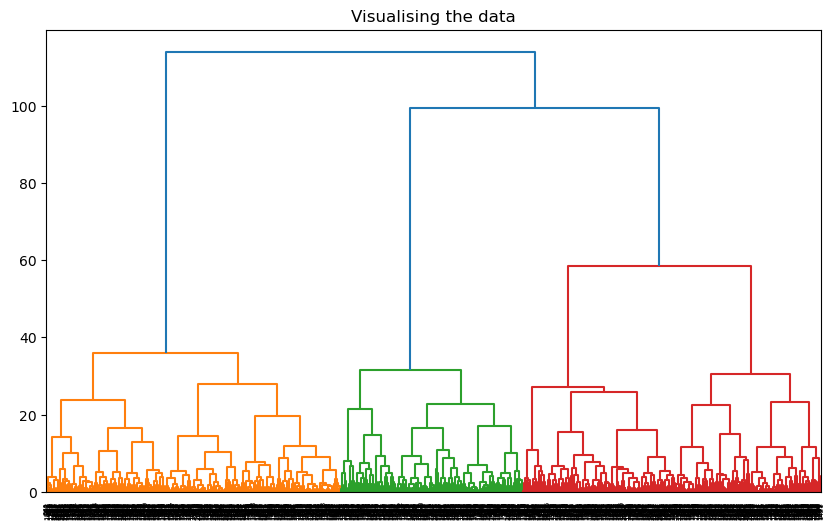

In [91]:
import scipy.cluster.hierarchy as shc


plt.figure(figsize =(10, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(final_x_agglo, method ='ward')))

### Model Building for Agglomerative Clustering

In [100]:
X=final_x_agglo.iloc[:,:-1]
y=final_x_agglo['Agglomerative Cluster']
print(X.head())
print(y.head())

          0         1  2  3
0  2.449385 -0.020863  2  4
1 -2.326871  0.039744  2  4
2  1.740758 -0.314040  2  5
3 -1.921038 -1.288085  2  5
4 -0.532121  0.470885  4  3
0    1
1    0
2    1
3    0
4    0
Name: Agglomerative Cluster, dtype: int64


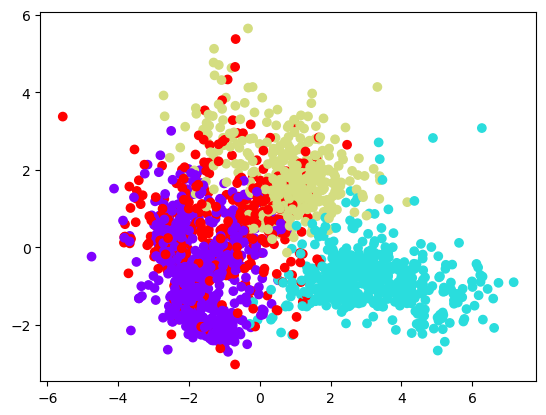

In [101]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=agglomerative_cluster.labels_,cmap="rainbow")
plt.show()

In [102]:
## Doing train test split(pca data and cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(1522, 4)


(508, 4)

In [103]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9224704336399474
Test accuracy: 0.9192913385826772


In [104]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9566929133858267


In [105]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9783464566929134


In [106]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9500657030223391
Test accuracy: 0.952755905511811


In [107]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9060446780551905
Test accuracy: 0.9015748031496063


#### conclusion
Random forest gives good accuracy in Agglomerative Clustering 

## DBSCAN Clustering

In [108]:
final_x_db=final_X.iloc[:,:-1]
final_x_db

,0,1,2,3
0,2.449385,-0.020863,2,4
1,-2.326871,0.039744,2,4
2,1.740758,-0.314040,2,5
3,-1.921038,-1.288085,2,5
4,-0.532121,0.470885,4,3
...,...,...,...,...
2025,6.276521,3.078699,3,3
2026,0.833418,1.256099,2,5
2027,2.048191,-0.278236,2,2
2028,1.429494,1.194361,3,5


db_Cluster
-1     1201
 4      151
 6       98
 0       82
 2       73
 11      60
 7       40
 1       38
 9       37
 8       33
 10      31
 5       23
 12      21
 3       18
 20      15
 17      14
 13      13
 16      12
 15      11
 18      11
 14      11
 22      10
 21      10
 19      10
 23       7
Name: count, dtype: int64


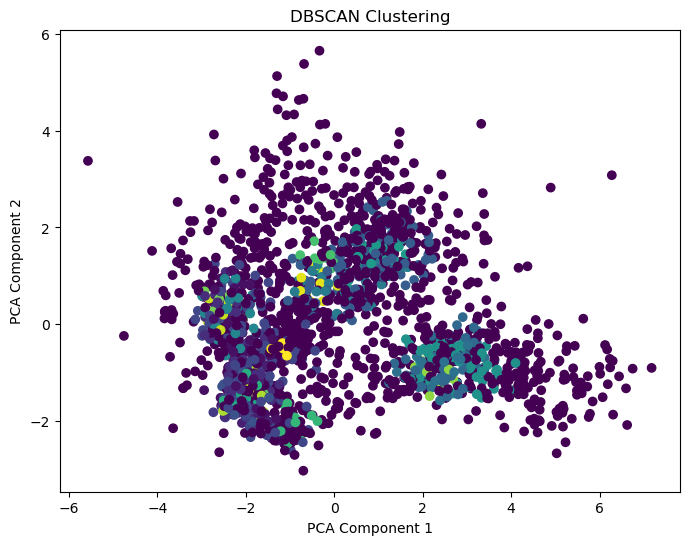

In [109]:
from sklearn.cluster import DBSCAN


# Initializing DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10) # You may need to adjust these hyperparameters based on your data

# Performing clustering
clusters = dbscan.fit_predict(final_x_db)

# Adding the cluster labels to the DataFrame
final_x_db['db_Cluster'] = clusters

# Printing the count of data points in each cluster
print(final_x_db['db_Cluster'].value_counts())

# Visualizing the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')
plt.show()

In [110]:
X_final=final_X.iloc[:,:-1]

In [111]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_final)
kmeans_silhouette = silhouette_score(X_final, kmeans_clusters)
print("K-means Silhouette Score:", kmeans_silhouette)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_final)
dbscan_silhouette = silhouette_score(X_final, dbscan_clusters)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clusters = agg_cluster.fit_predict(X_final)
agg_silhouette = silhouette_score(X_final, agg_clusters)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)


K-means Silhouette Score: 0.25104440045643317
DBSCAN Silhouette Score: -0.34766945107519837
Agglomerative Clustering Silhouette Score: 0.23235715444609506


### Model Building for dbscan

In [112]:
X=final_x_db.iloc[:,:-1]
y=final_x_db['db_Cluster']

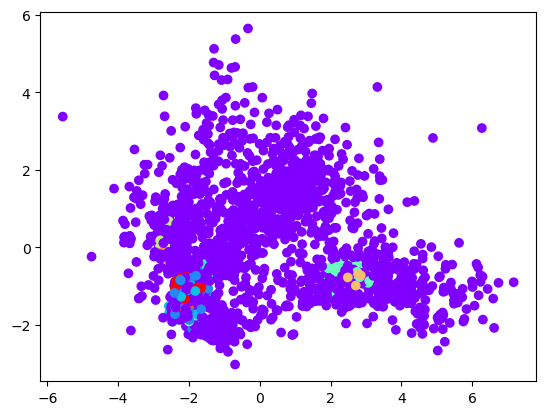

In [113]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=dbscan.labels_,cmap="rainbow")
plt.show()

In [114]:
## Doing train test split(pca data and db scan cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(1522, 4)


(508, 4)

In [115]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.5972404730617609
Test accuracy: 0.5885826771653543


In [116]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9429133858267716


In [117]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9625984251968503


In [118]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.7339027595269383
Test accuracy: 0.7165354330708661


In [119]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.7982917214191853
Test accuracy: 0.8267716535433071


#### conclusion
Random Forest gives good accuracy in DBScan Clustering
overall dbscan is not good for our dataset

## Finalized model

In [120]:
final_X.head()

,0,1,2,3,Cluster
0,2.449385,-0.020863,2,4,1
1,-2.326871,0.039744,2,4,0
2,1.740758,-0.314040,2,5,1
3,-1.921038,-1.288085,2,5,2
4,-0.532121,0.470885,4,3,0


In [121]:
X=final_X.iloc[:,:-1]
y=final_X['Cluster']

In [125]:
#Random forest classifier cross validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    final_model.fit(X_train,Y_train)
    Y_pred_train=final_model.predict(X_train)
    Y_pred_test=final_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 0.999
cross validation test accuracy score= 0.982


In [126]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("final_model.pkl","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [133]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Sample training data
X_train = pd.DataFrame({
    'Income': [50000, 60000, 70000, 80000],
    'Kidhome': [1, 2, 1, 0],
    'Teenhome': [1, 0, 2, 1],
    'Recency': [10, 20, 30, 40],
    'NumDealsPurchases': [5, 6, 7, 8],
    'NumWebPurchases': [4, 3, 2, 1],
    'NumCatalogPurchases': [1, 2, 3, 4],
    'NumStorePurchases': [8, 7, 6, 5],
    'NumWebVisitsMonth': [6, 5, 4, 3],
    'AcceptedCmp3': [0, 1, 0, 1],
    'AcceptedCmp4': [1, 0, 1, 0],
    'AcceptedCmp5': [0, 0, 1, 1],
    'AcceptedCmp1': [1, 1, 0, 0],
    'AcceptedCmp2': [0, 0, 1, 1],
    'Complain': [0, 1, 0, 1],
    'Response': [1, 0, 1, 0],
    'total_amount_spent': [200, 300, 400, 500],
    'Children': [2, 3, 1, 0]
})

# Selecting continuous features
continuous_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
                      'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
                      'Response', 'total_amount_spent', 'Children']
X_continuous = X_train[continuous_columns]

# Fit and transform using the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

# Fit and transform using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Save the scaler and PCA objects to pickle files
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("pca.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)


In [141]:
df.iloc[45:47]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amount_spent,Children
45,Graduation,Single,79941.0,0,0,72,1,2,4,9,1,0,0,0,0,0,0,0,984,0
46,2n Cycle,Married,7500.0,0,0,24,3,3,1,3,9,0,0,0,0,0,0,1,122,0


In [140]:
categorical_variables.iloc[45:47]

,Education,Marital_Status
45,2,4
46,0,3


In [95]:
sample_data=[4, 2, 26642.0, 1, 0, 71, 2, 2, 0, 3, 6, 0, 0, 0, 0, 0, 0, 0, 42, 1]

In [96]:
scaled_sample=sc.fit_transform([sample_data])

In [97]:
final_model.predict(scaled_sample)

array([2])